In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import eigh

from klap.kernels import (
    rbf_kernel,
    rbf_laplacian,
    exp_kernel,
    exp_laplacian
)
from klap.datasets import (
    concentric_circle,
    halfmoons,
)


np.random.seed(100)

In [2]:
n = 10000
p = 200

# Learn halfmoons
x = halfmoons(n, noise_level=.1)
X, Y = np.meshgrid(np.linspace(-1.5, 1.5, num=500), np.linspace(-1.5, 2.5, num=500))

# # Concentric circles
# x = concentric_circle(n, noise_level=0)
# X, Y = np.meshgrid(np.linspace(-4.5, 4.5, num=500), np.linspace(-4.5, 4.5, num=500))
# n, p, sigma = 10000, 1000, .2 * np.sqrt(2)

# # Learn Hermite
# x = np.random.randn(n, 2) * .5
# X, Y = np.meshgrid(np.linspace(-1, 1, num=500), np.linspace(-1, 1, num=500))

# # Learn Fourier
# x = np.random.rand(n, 2)
# X, Y = np.meshgrid(np.linspace(0, 1, num=500), np.linspace(0, 1, num=500))

In [3]:
x_repr = x[:p]

sigma = .2 * np.sqrt(2)
kernel = rbf_kernel

K = kernel(x_repr, x, sigma=sigma)
L = rbf_laplacian(x_repr, x, sigma=sigma, K=K)
R = K @ K.T
L /= n
R /= n

In [4]:
error = eigh(L, eigvals_only=True, subset_by_index=[0,0])[0]
if error < 0:
    reg = -error * 1.1
if error > 0:
    reg = 0
w, v = eigh(R, L + reg * np.eye(len(L)), subset_by_index=[len(L)-16, len(L)-1])

In [5]:
x_test = np.vstack((X.flatten(), Y.flatten())).T
k_test = kernel(x_test, x_repr, sigma=sigma)
y_test = k_test @ v
y_test /= np.sqrt(np.mean(y_test**2, axis=0))

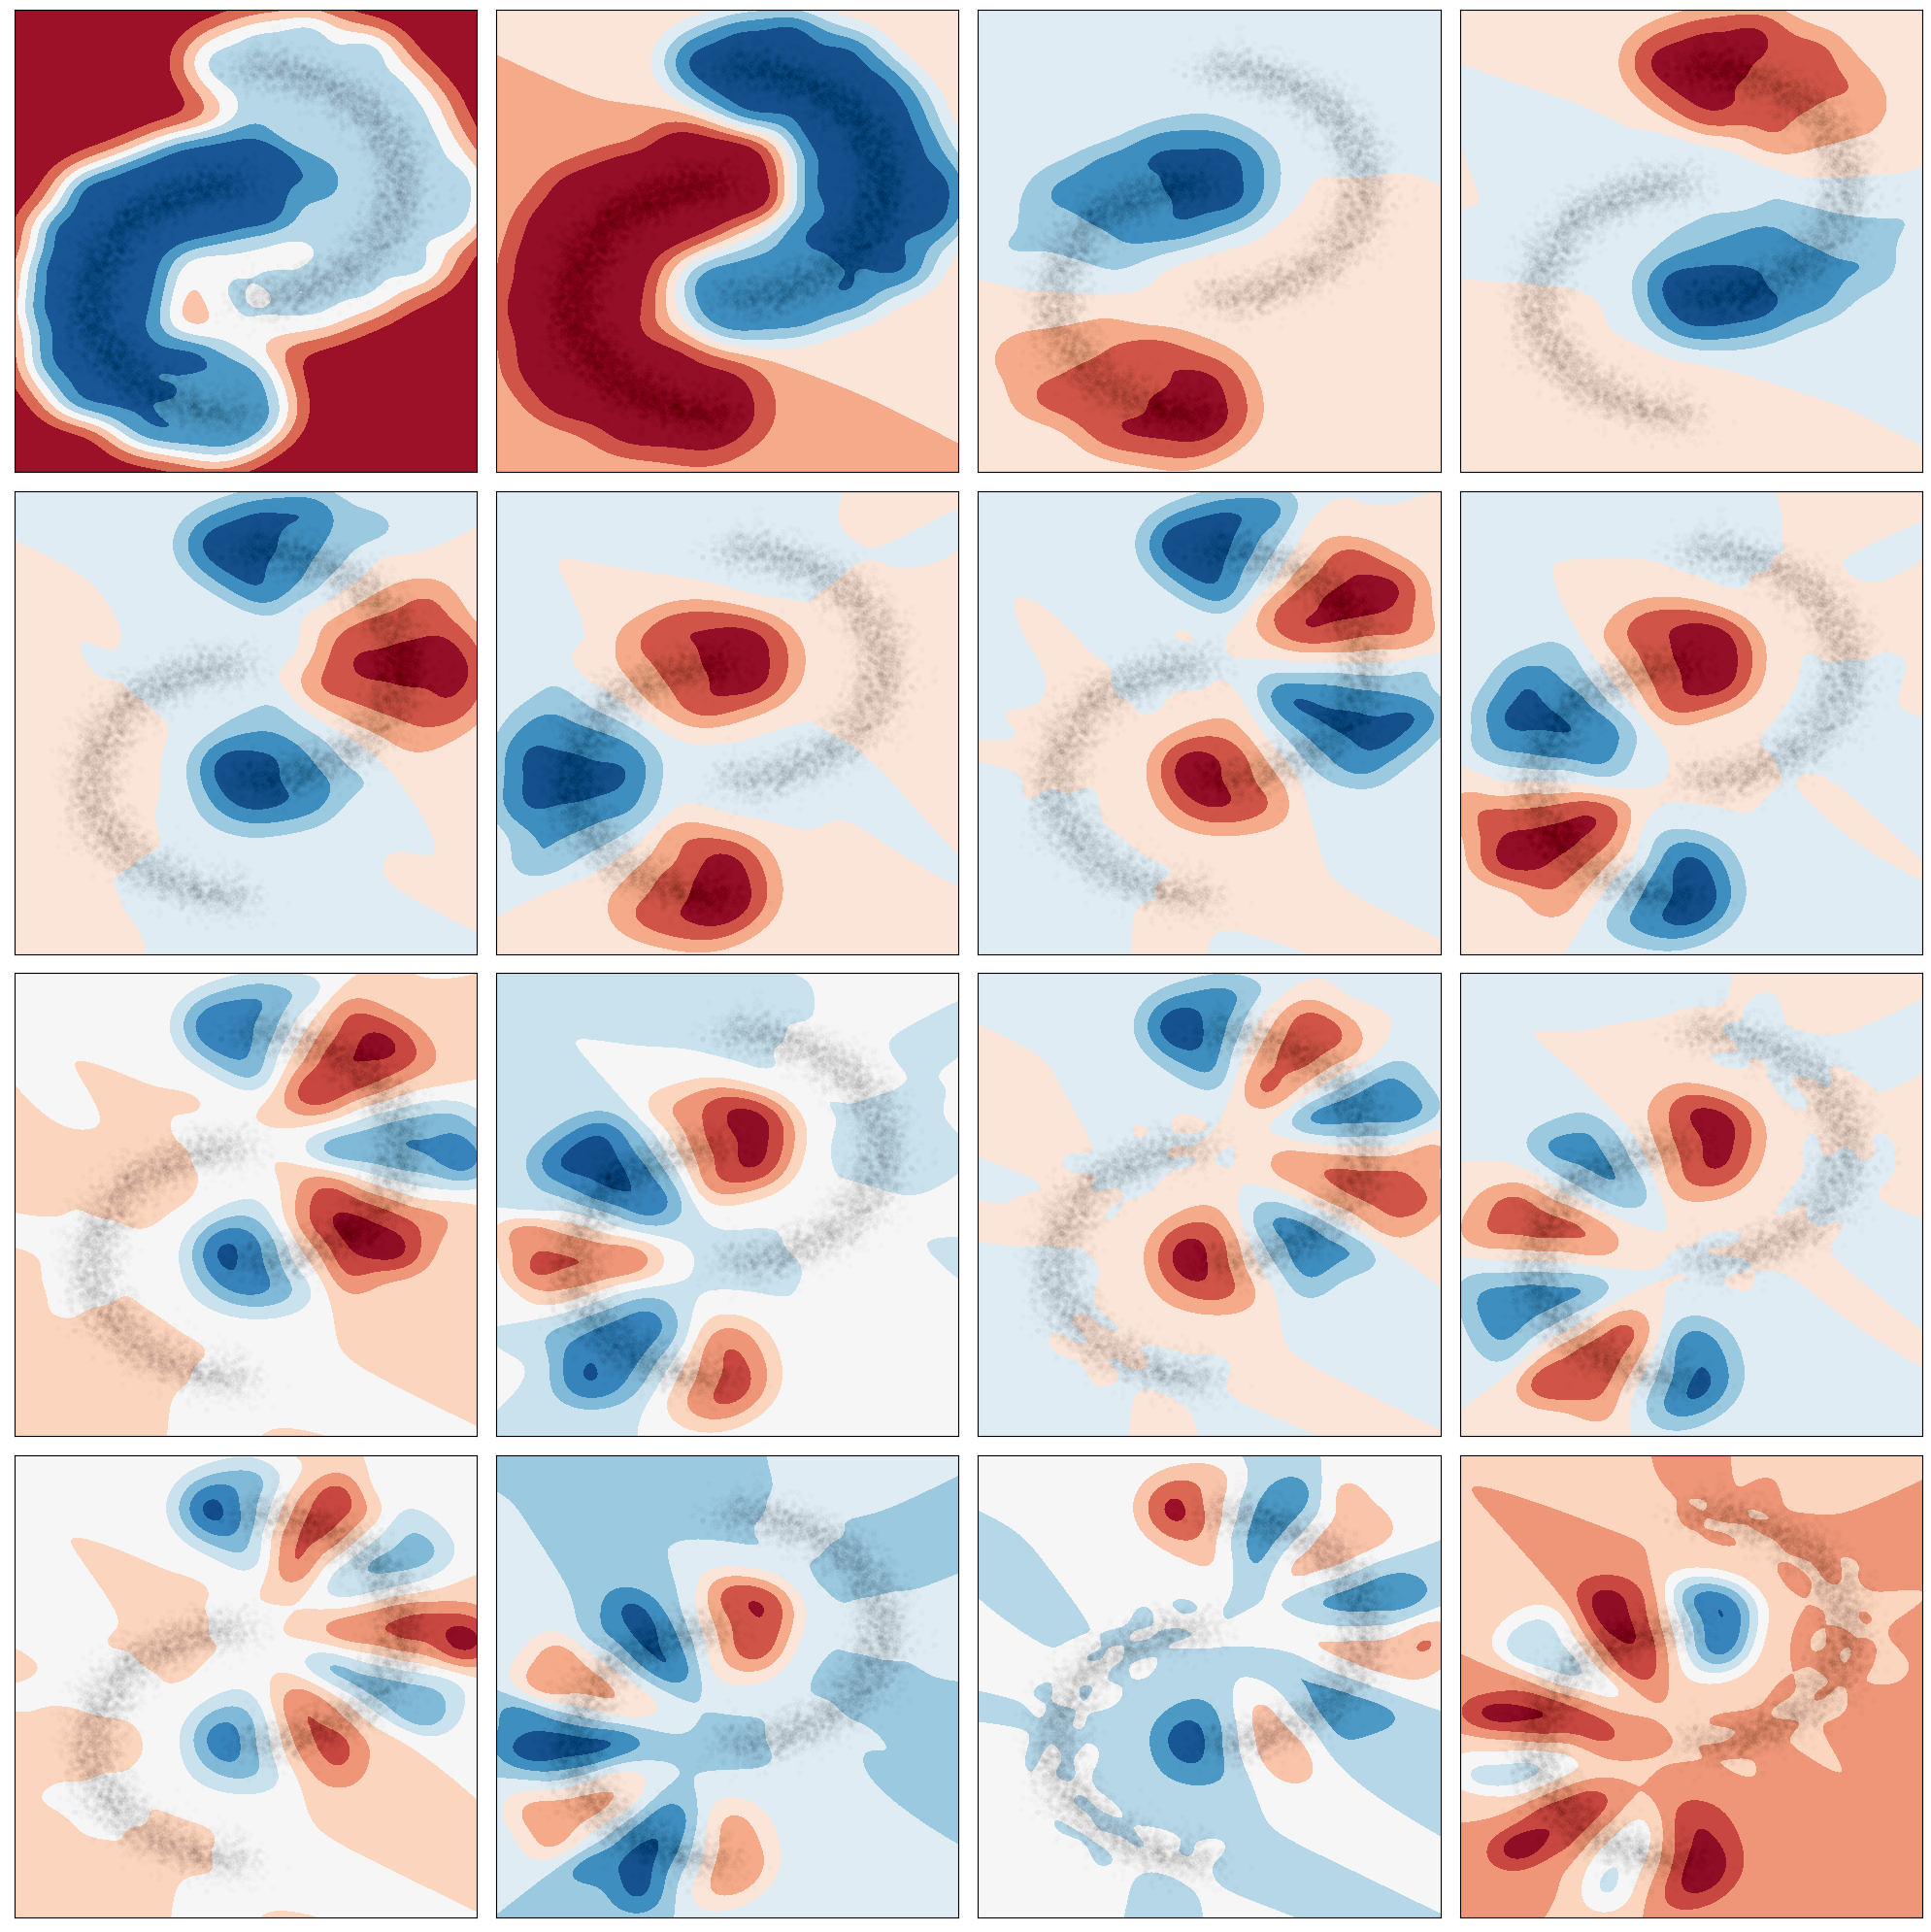

In [6]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for i in range(16):
    axes[i//4, i%4].contourf(X, Y, y_test[:, -i-1].reshape(*X.shape), cmap='RdBu_r')
    axes[i//4, i%4].scatter(x[:, 0], x[:, 1], alpha=.01, s=10, c='k')
    axes[i//4, i%4].tick_params(axis="both", which="major", labelleft=False, labelbottom=False)
    axes[i//4, i%4].set_xticks([])
    axes[i//4, i%4].set_yticks([])
    # axes[i//4, i%4].set_xlim(-1, 1)
    # axes[i//4, i%4].set_ylim(-1, 1)
fig.tight_layout()
# fig.savefig('halfmoons.jpg')